### Student Information
Name: 李承諭

Student ID: 109501009

GitHub ID: #95518319

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [347]:
### Begin Assignment Here

## Table of Contents
1. Data Source
2. Data Mining Using Pandas
     - 2.1 Dealing with Missing Values
     - 2.2 Dealing with Duplicate Data 
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion
9. References

In [348]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Dataset Download

In [349]:
import pandas as pd
df = pd.read_csv("/Users/cheng-yu/Desktop/DMLab1/DM2024-Lab1-Homework/YouTube Nostalgic Comments.csv")

# Since this is pandas dataframe, no need to convert it from python dictionary.

In [350]:
print(df)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [351]:
# try a simple query 
df[:10]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...

In [352]:
# using loc (by label)
df.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [353]:
# using iloc (by position)
df.iloc[:10, 1]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

## 2. Data Mining Using Pandas

### 2.1 Missing Values

In [354]:
# check missing values
df.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [355]:
# more detailed way to check missing values 
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [356]:
# swap the axis
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [357]:
dummy_series = pd.Series(["dummy_record"], index=["sentiment"])

In [358]:
dummy_series

sentiment    dummy_record
dtype: object

In [359]:
dummy_series.to_frame().T

sentiment
0  dummy_record

In [360]:
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [361]:
# check if the records was commited into result
len(result_with_series)

1501

In [362]:
# dummy record as dictionary format
dummy_dict = [{'sentiment': 'dummy_record',
              }]

In [363]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [364]:
# let's see how isnull() funciton when finding out the missing value
result_with_series.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1496      False    False
1497      False    False
1498      False    False
1499      False    False
1500      False     True

[1501 rows x 2 columns]

In [365]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [366]:
len(df)

1501

In [367]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

In [368]:
# now we want to drop the missing value
df.dropna(inplace = True)

In [369]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [370]:
len(df)

1500

### 2.2 Dealing with Duplicate Data

In [371]:
df.duplicated() # This method could miss the duplicated data!

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [372]:
sum(df.duplicated())

1

In [373]:
sum(df.duplicated('comment'))

1

In [374]:
sum(df.duplicated('sentiment'))

1498

In [375]:
# I want to see which two or multiple line is duplicated, but found out it only return one line
df[df.duplicated()]

sentiment                                            comment
78  not nostalgia  never heard this song before... WOW What an am...

In [376]:
# Then inputting "keep = False" can give me every line that is duplicated
df[df.duplicated(keep = False)]

sentiment                                            comment
62  not nostalgia  never heard this song before... WOW What an am...
78  not nostalgia  never heard this song before... WOW What an am...

In [377]:
# df.drop_duplicates(keep = False, inplace = True) 
# inplace applies changes directly on our dataframe

In [378]:
len(df)

1500

In [379]:
# I want to keep one of the duplicated values, so I could either imply "keep = 'first'," or "keep = 'last'."
df.drop_duplicates(keep = 'last', inplace = True)

In [380]:
len(df)

1499

## 3. Data Preprocessing

### 3.1 Sampling

In [381]:
df_sample = df.sample(n = 500) # random state

In [382]:
len(df_sample)

500

In [383]:
df_sample[0:5]

sentiment                                            comment
103   not nostalgia  I have such a hard time showing my love for th...
279   not nostalgia  To everyone who really knows his best yet to c...
535       nostalgia                     takes me back of my teen years
95    not nostalgia  My mom told me to look him up and listen to th...
1358  not nostalgia  I love these doomsday songs - knowing it's jus...

In [384]:
import matplotlib.pyplot as plt
%matplotlib inline 
# This line can ensure all the graphs are shown directly on jupyter notebook rather than on a new interface.

In [385]:
df['sentiment'].value_counts()

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

[Text(0, 0, '750'), Text(0, 0, '749')]

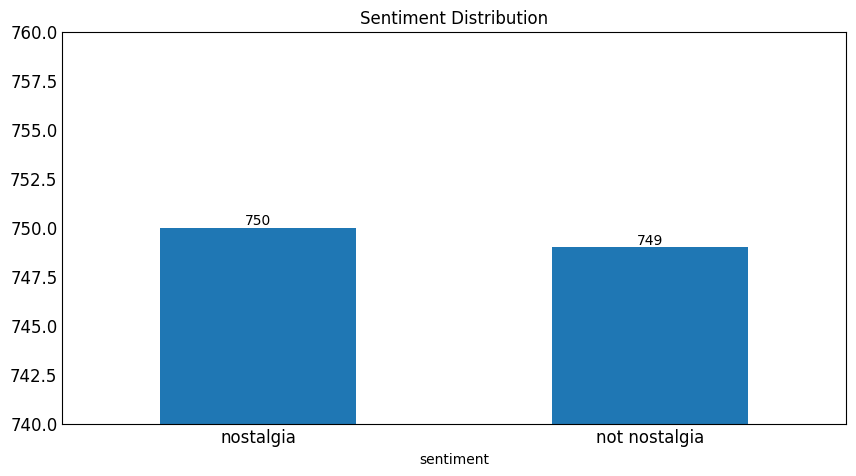

In [386]:
ylim_lower = 740  
ylim_upper = 760

# create figure and axis in order to add the labels
fig, ax = plt.subplots()

bars = df['sentiment'].value_counts().plot(kind = 'bar',
                                   title = 'Sentiment Distribution',
                                   ylim = [ylim_lower, ylim_upper],
                                   rot = 0, fontsize = 12, figsize = (8,4), ax = ax)

# adding number label above every bar
ax.bar_label(bars.containers[0], fontsize=10, label_type='edge')

[Text(0, 0, '255'), Text(0, 0, '245')]

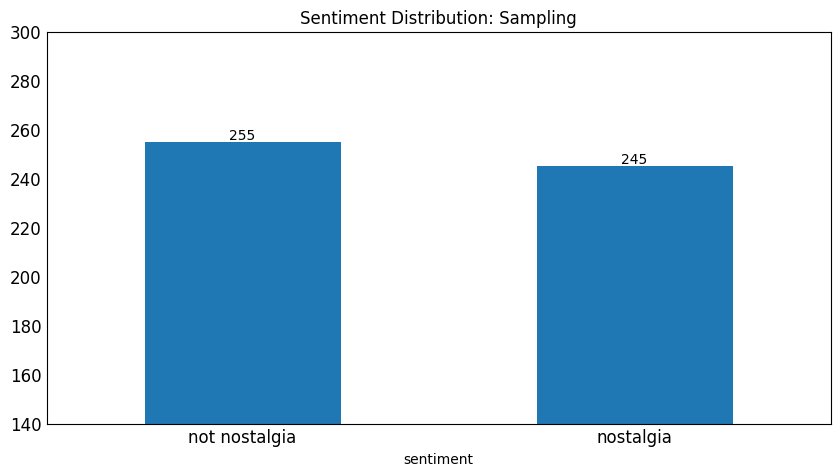

In [387]:
ylim_lower = 140
ylim_upper = 300

# create figure and axis in order to add the labels
fig, ax = plt.subplots()

bars_sample = df_sample['sentiment'].value_counts().plot(kind = 'bar',
                                   title = 'Sentiment Distribution: Sampling',
                                   ylim = [ylim_lower, ylim_upper],
                                   rot = 0, fontsize = 12, figsize = (8,4), ax = ax)

# adding number label above every bar
ax.bar_label(bars_sample.containers[0], fontsize=10, label_type='edge')

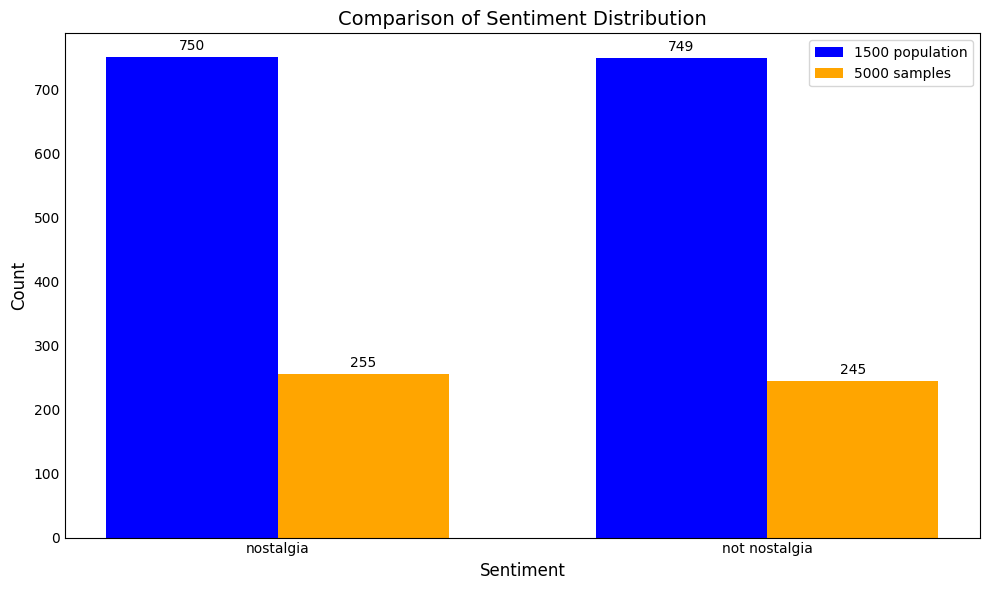

In [388]:
# create a side-by-side bar chart comparing population and sample
import numpy as np
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts_sample = df_sample['sentiment'].value_counts()

# set x axis
labels = sentiment_counts.index
x = np.arange(len(labels))

# set bar width
width = 0.35

# create the bar chart
fig, ax = plt.subplots(figsize = (10, 6))

# draw two bars
bars1 = ax.bar(x - width / 2, sentiment_counts.values, width, label = '1500 population', color = 'blue')
bars2 = ax.bar(x + width / 2, sentiment_counts_sample.values, width, label = '5000 samples', color = 'orange')

# add labels and title
ax.set_title('Comparison of Sentiment Distribution', fontsize = 14)
ax.set_xlabel('Sentiment', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add number label
ax.bar_label(bars1, padding = 3)
ax.bar_label(bars2, padding = 3)

# show graph
plt.tight_layout()
plt.show()

# graph style
plt.style.use('_mpl-gallery-nogrid')

In [389]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### 3.2 Feature Creation

In [390]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/cheng-
[nltk_data]     yu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [391]:
# takes time to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [392]:
df[0:5]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

In [393]:
df[:5]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...  
4  [listening, to, his, songs, reminds, me, of, m...

In [394]:
list(df[:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 3.3 Feature Subset Selection

In [395]:
from sklearn.feature_extraction.text import CountVectorizer

# transform the text into document-term matrix, make it easier for the model input, such as TF-IDF
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[3])

  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(3336))	3
  (np.int32(0), np.int32(233))	1
  (np.int32(0), np.int32(3284))	2
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(258))	1
  (np.int32(0), np.int32(2328))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int32(593))	1
  (np.int32(0), np.int32(1347))	2
  (np.int32(0), np.int32(3713))	1
  (np.int32(0), np.int32(3278))	1
  (np.int32(0), np.int32(1964))	1
  (np.int32(0), np.int32(3610))	1
  (np.int32(0), np.int32(1936))	1
  (np.int32(0), np.int32(2254))	3
  (np.int32(0), np.int32(3622))	1
  (np.int32(0), np.int32(1798))	1
  (np.int32(0), np.int32(91))	1
  (np.int32(0), np.int32(906))	1
  (np.int32(0), np.int32(1386))	2
  (np.int32(0), np.int32(62))	1
  (np.int32(0), np.int32(3364))	2
  (np.int32(0), np.int32(3513))	1
  :	:
  (np.int32(0), np.int32(2026))	2
  (np.int32(0), np.int32(2091))	1
  (np.int32(0), np.int32(2114))	1
  (np.int32(0), np.int32(589))	1
  (np.int32(0), n

In [396]:
count_vect.get_feature_names_out()[1408]

'gal'

In [397]:
count_vect.get_feature_names_out()[18]

'18'

In [398]:
count_vect.get_feature_names_out()[143]

'70s'

In [399]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [400]:
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [401]:
# We can check the shape of this matrix by:
# (row, column) -> (document, words)
df_counts.shape

(1499, 3730)

In [402]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[100:110]

array(['3rd', '40', '400', '40s', '40th', '40years', '40yrs', '42',
       '44yr', '45'], dtype=object)

In [403]:
# [5 document in the row, 100 words in the column] turn it from sparse matrix into a normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [404]:
# return the first word in the array
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [405]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [406]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [407]:
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

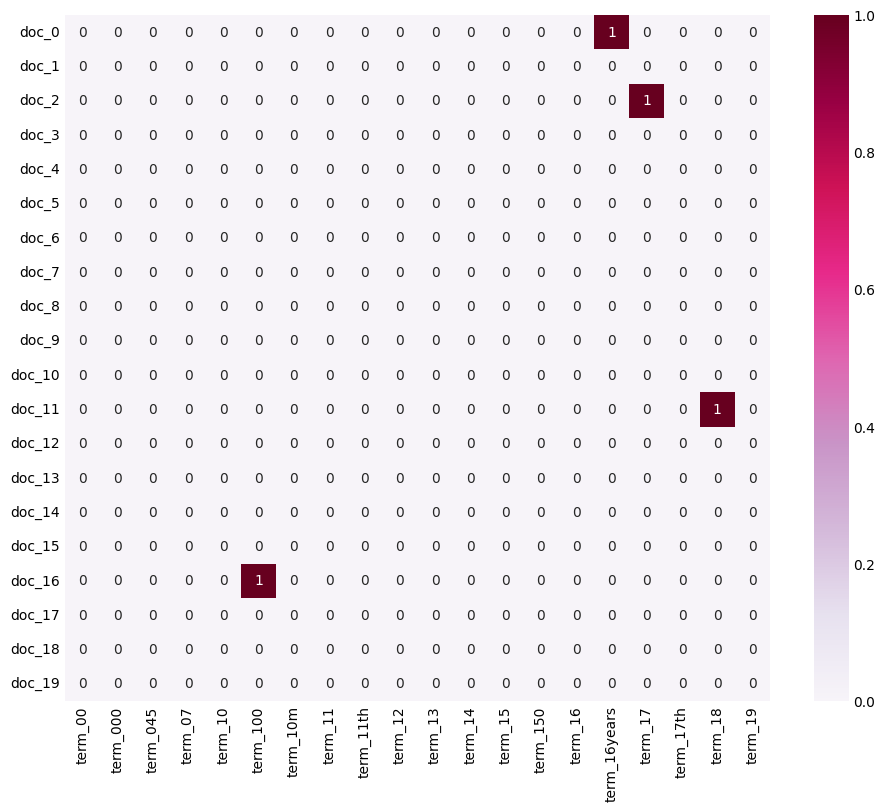

In [408]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 3.4 Attribute Transformation/ Aggegation

In [409]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [410]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [411]:
term_frequencies[0] #np.int64(1)

np.int64(1)

/var/folders/8g/026l6x8j1qb6bl5t7vchk_wm0000gn/T/ipykernel_6112/3154536313.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


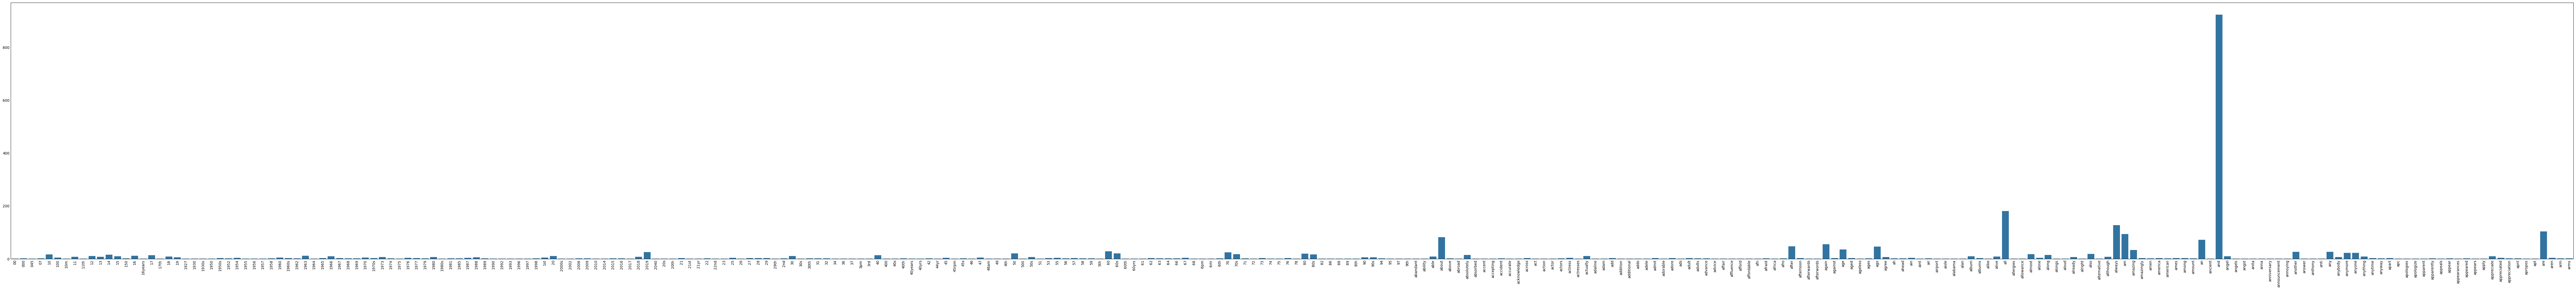

In [412]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)
plt.show()

/var/folders/8g/026l6x8j1qb6bl5t7vchk_wm0000gn/T/ipykernel_6112/4137697586.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(top_terms['Term'], rotation=90)


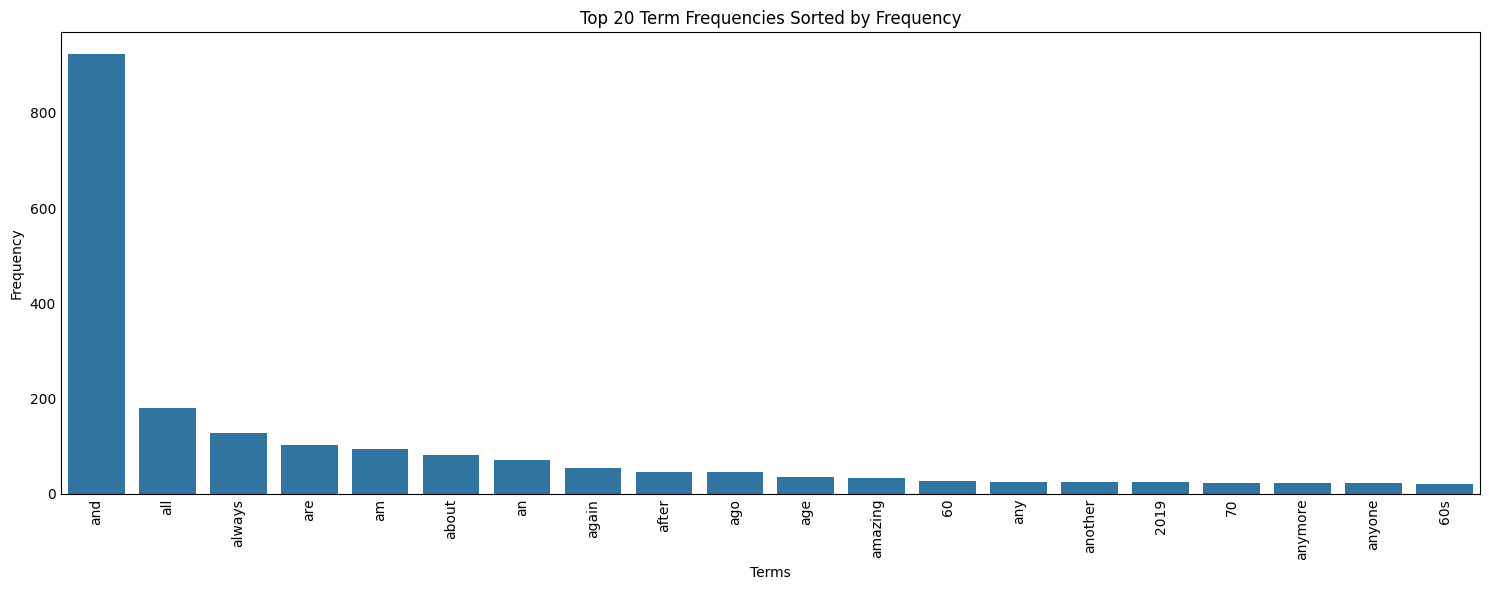

In [413]:
# Answer here

features = count_vect.get_feature_names_out()[:300]
term_frequencies = np.asarray(df_counts.sum(axis=0))[0][:300]

# Create a DataFrame
data = pd.DataFrame({
    'Term': features,
    'Frequency': term_frequencies
})

# Sort the DataFrame by frequency in descending order
data_sorted = data.sort_values(by='Frequency', ascending=False)

# Set the number of top terms to visualize
top_n = 20  # Change this number to visualize more or fewer terms

# Select only the top N terms for visualization
top_terms = data_sorted.head(top_n)

# Create the bar plot for top N terms sorted by frequency
plt.subplots(figsize=(15, 6))  # Adjust size for better visibility
g = sns.barplot(x='Term', y='Frequency', data=top_terms)
g.set_xticklabels(top_terms['Term'], rotation=90)

# Set titles and labels
plt.title(f'Top {top_n} Term Frequencies Sorted by Frequency')
plt.xlabel('Terms')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [414]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/8g/026l6x8j1qb6bl5t7vchk_wm0000gn/T/ipykernel_6112/2166548998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


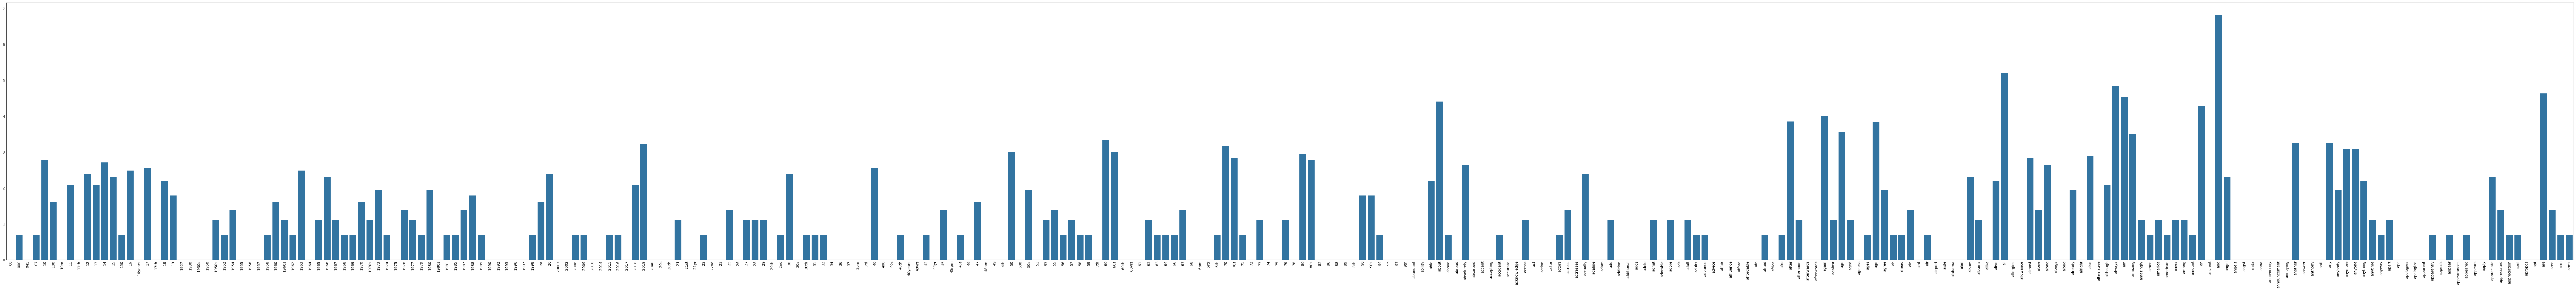

In [415]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

#### Now we've done the words frequency analysis, let's move on to the PAMI pattern mining

In [416]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels -> sentiment in this case
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

# 整體來看，這段程式碼的目的是：
# 按照不同的類別將文本數據分組。
# 為每個類別創建一個獨立的詞-文檔矩陣，以便能夠進行後續的模式挖掘或分析。這樣做可以幫助識別每個類別中的特徵和模式，
# 使得對各類別之間的區分和比較變得更加容易。

In [417]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number = 0 # You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

remove the bottom 1% of the least frequent words and the top 5% of the most frequent ones to help us focus on words that might reveal more valuable patterns. In this case, 1% and 5% are **arbitraty**, but in other applicatoins, domain knowledge might guide us to filter words differently.

In [418]:
category_number = 1 #You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['neighborhood', 'neighbor', 'needed', 'nearly', 'nearer', 'nc', '16years', '150', '1954', '1930s', 'featured', 'imprinted', 'impossible', 'impersonate', 'insane', 'fathers', 'head', 'he', '1981', 'nicer', '15', '07', '1977', '1976', '1975', 'natural', 'naples', 'nana', 'nan', 'names', 'never', 'na', '21st', '20s', '2040', '2019', '2018', '2017', '2015', '2010', '2009', '2002', '2000s', 'musician', 'murray', 'munster', 'mummy', 'naver', 'happened', 'happen', 'hank', 'hanged', 'handball', '3pm', 'ms', 'mph', 'movie', 'move', 'myanmar', '30s', '29th', '29', '1980s', '1979', '21yr', '45s', '45rpm', '42', '40th', '40s', '400', 'hdqrs', 'nelson', 'had', 'habit', 'gut', 'gunner', 'gun', 'guessing', 'happening', '8th', '5th', '59', '58', '57', '53', '50s', '50', '46', '70s', 'mostly', 'morning', '27', '25', '22nd', '22', '61', '60', 'haired', 'hahaha', 'hd', 'hawaii', 'having', 'haven', 'hauntingly', 'haunting', 'hats', 'hatin

In [419]:
category_number = 1 # You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['neighborhood', 'neighbor', 'needed', 'nearly', 'nearer', 'nc', '16years', '150', '1954', '1930s', 'featured', 'imprinted', 'impossible', 'impersonate', 'insane', 'fathers', 'head', 'he', '1981', 'nicer', '15', '07']


In [420]:
category_number = 1 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category nostalgia:


07  10  11  12  13  14  15  16  17  18  ...  yesterday  yokel  younger  \
0     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
1     0   0   0   0   0   0   0   0   1   0  ...          0      0        0   
2     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
3     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
4     0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...        ...    ...      ...   
745   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
746   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
747   0   0   0   0   1   0   0   0   0   0  ...          0      0        0   
748   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   
749   0   0   0   0   0   0   0   0   0   0  ...          0      0        0   

     youngster  your  yours  youth  youthful  youtube  yrs  
0            0     0      0      0         0        0    0  
1            0     0      0      0         0        0    0  
2            0     0      0      0         0        0    0  
3            0     1      0      0         0        0    0  
4            0     0      0      0         0        0    0  
..         ...   ...    ...    ...       ...      ...  ...  
745          0     0      0      0         0        0    0  
746          0     0      0      0         0        0    0  
747          0     0      0      0         0        0    0  
748          0     0      0      0         0        0    0  
749          0     0      0      0         0        0    0  

[750 rows x 2159 columns]

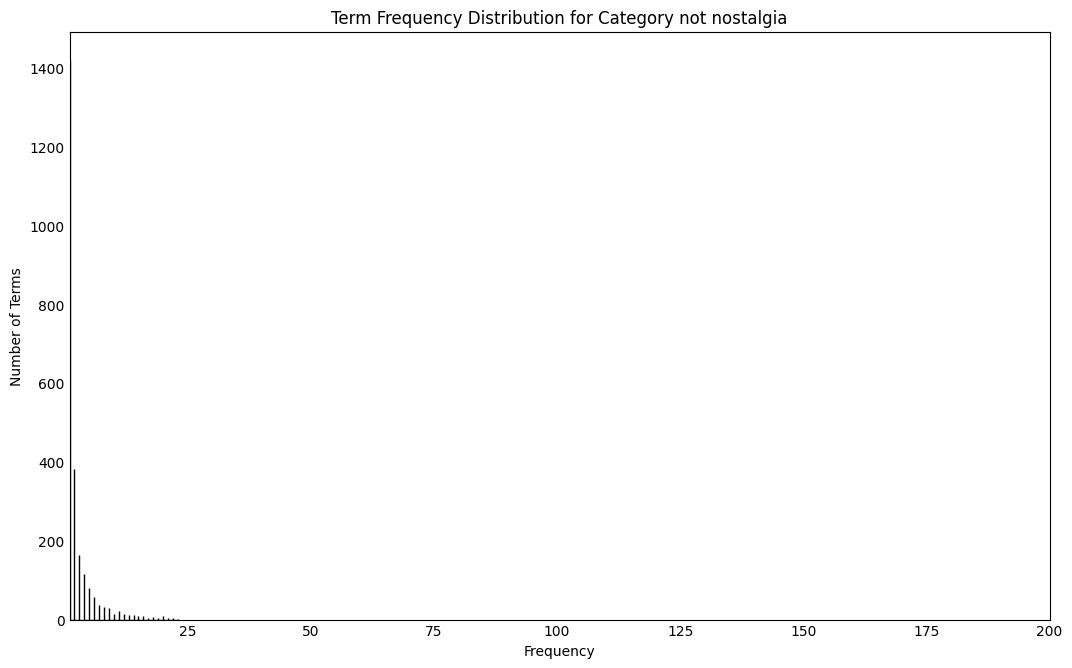

In [421]:
 # Sum over all documents to get total frequency for each word
category_number = 0  # You can change it from 0 to 1
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

#### Done with decument-term frequencyy dataframe, now let's head to the frequent pattern mining process.
1. convert our dataframe into a transactional database with PAMI
2. define the threshold that determines when a vallue in the data is considered a transaction

In [422]:
from PAMI.extras.DF2DB import DenseFormatDF as db_pami

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db_pami.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


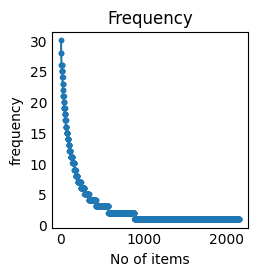

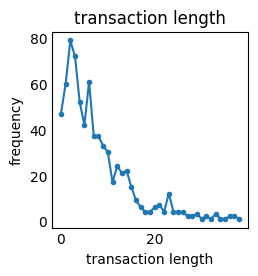

In [423]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


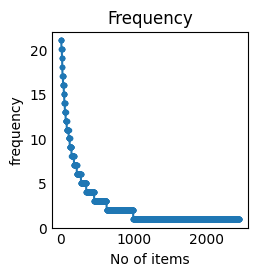

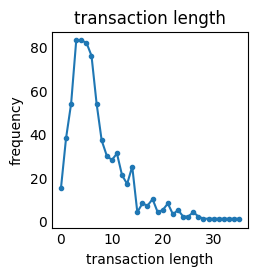

In [424]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [425]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9 # minimum support (support = frequency)
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.014348030090332031


In [426]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177        go       28
178     takes       30
179  favorite       30

[180 rows x 2 columns]

In [427]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.010626077651977539


In [428]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      every       21
140      loved       21
141    classic       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [429]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
pattern_dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for pattern_df in pattern_dfs:
    for pattern in pattern_df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in pattern_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for pattern_df in pattern_dfs:
    filtered_df = pattern_df[pattern_df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [430]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # df['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
0      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
0        0       0       0     0       0       0       0  
1        0       0       0     0       0       0       0  
2        0       0       0     0       0       0       0  
3        0       0       0     0       0       0       0  
4        0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1495     0       0       0     0       0       0       0  
1496     0       0       0     0       0       0       0  
1497     0       0       0     0       0       0       0  
1498     0       0       1     0       0       0       0  
1499     0       0       0     0       0       0       0  

[1499 rows x 3950 columns]

Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'nostalgia' category in our processed database.

### 3.5 Dimensionality Reduction

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [450]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values) # 2d 
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [451]:
df_pca_tdm.shape

(1499, 2)

In [452]:
df_tsne_tdm.shape

(1499, 2)

In [453]:
df_umap_tdm.shape

(1499, 2)

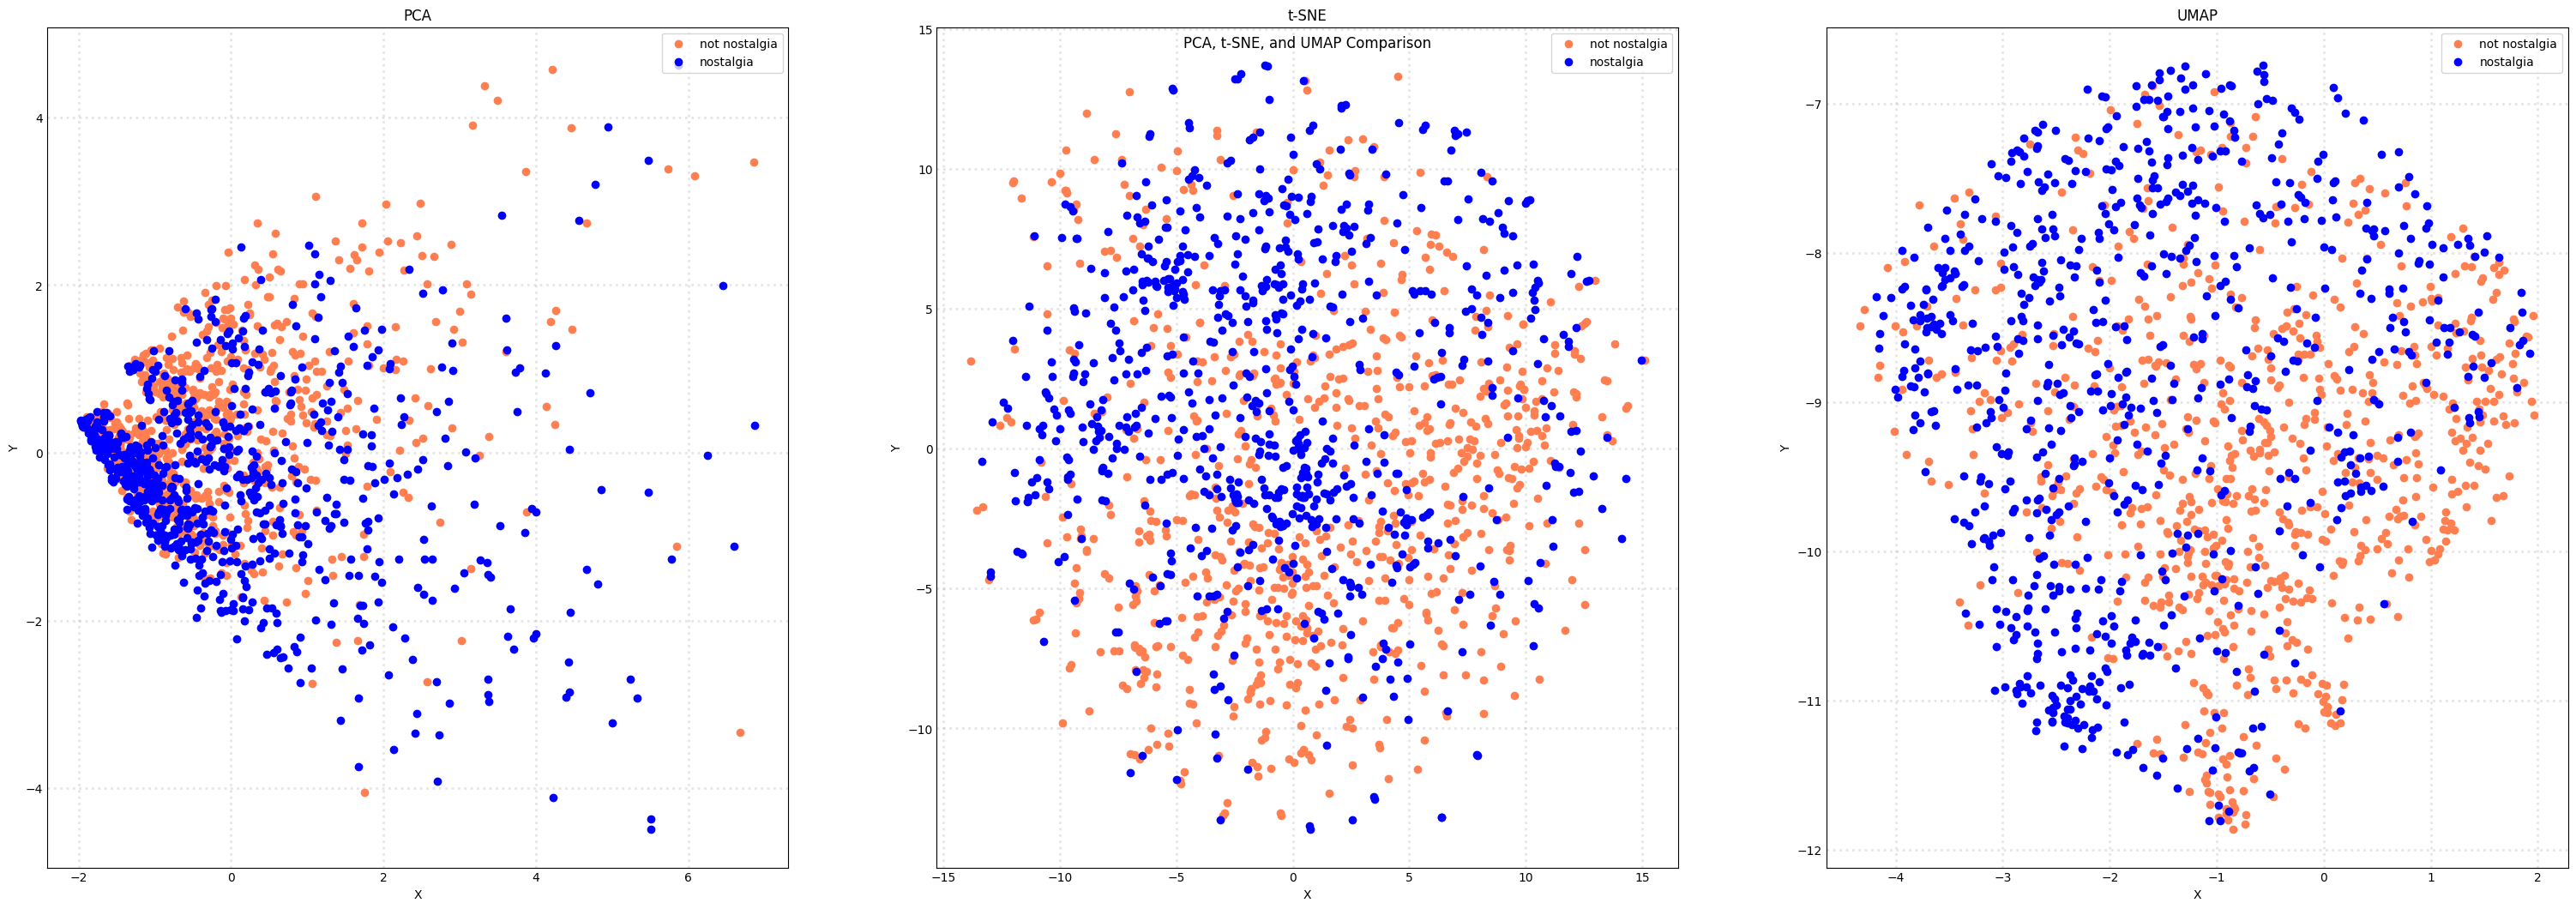

In [454]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

In [455]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
df_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

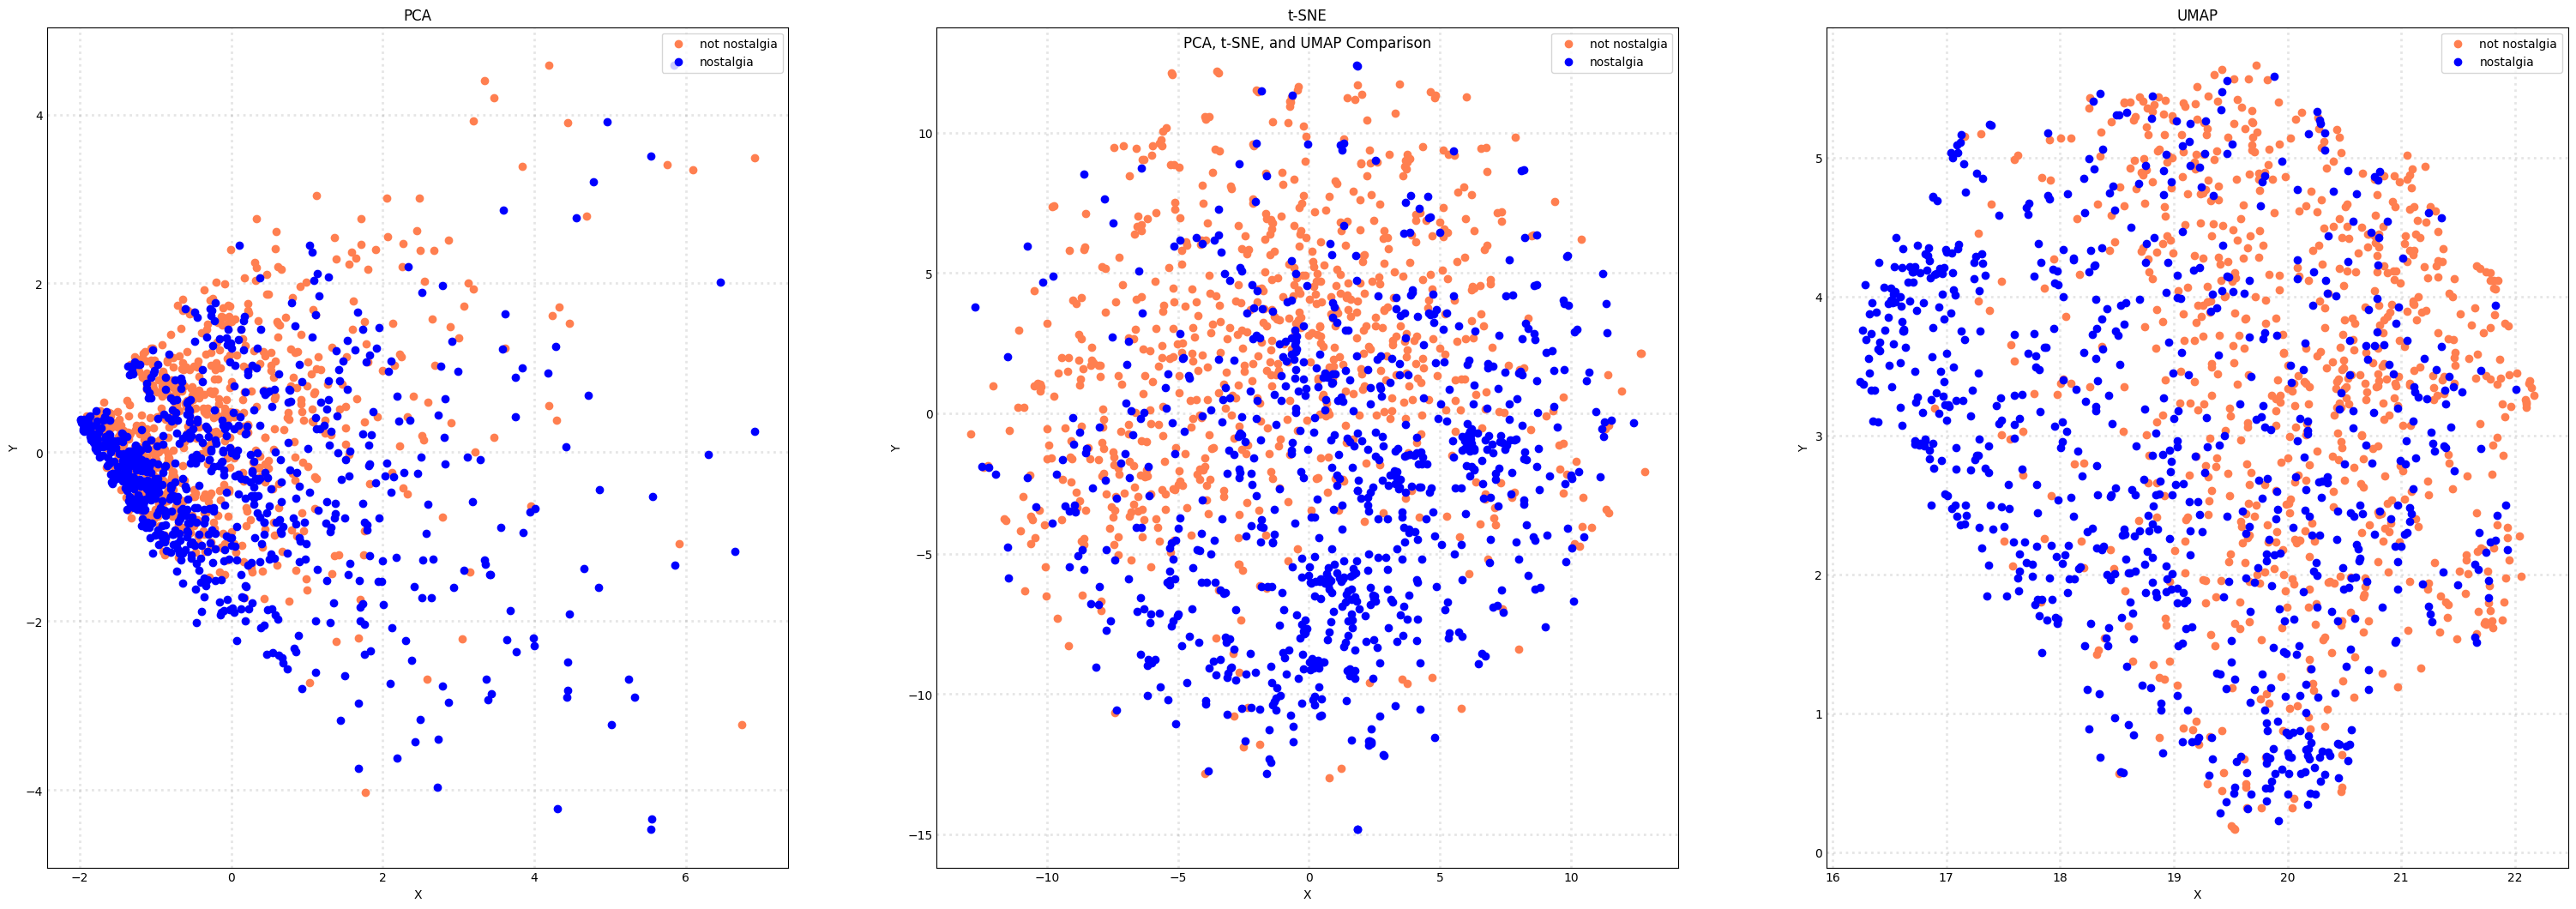

In [456]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_aug, 'PCA')
plot_scatter(axes[1], df_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_umap_aug, 'UMAP')

plt.show()

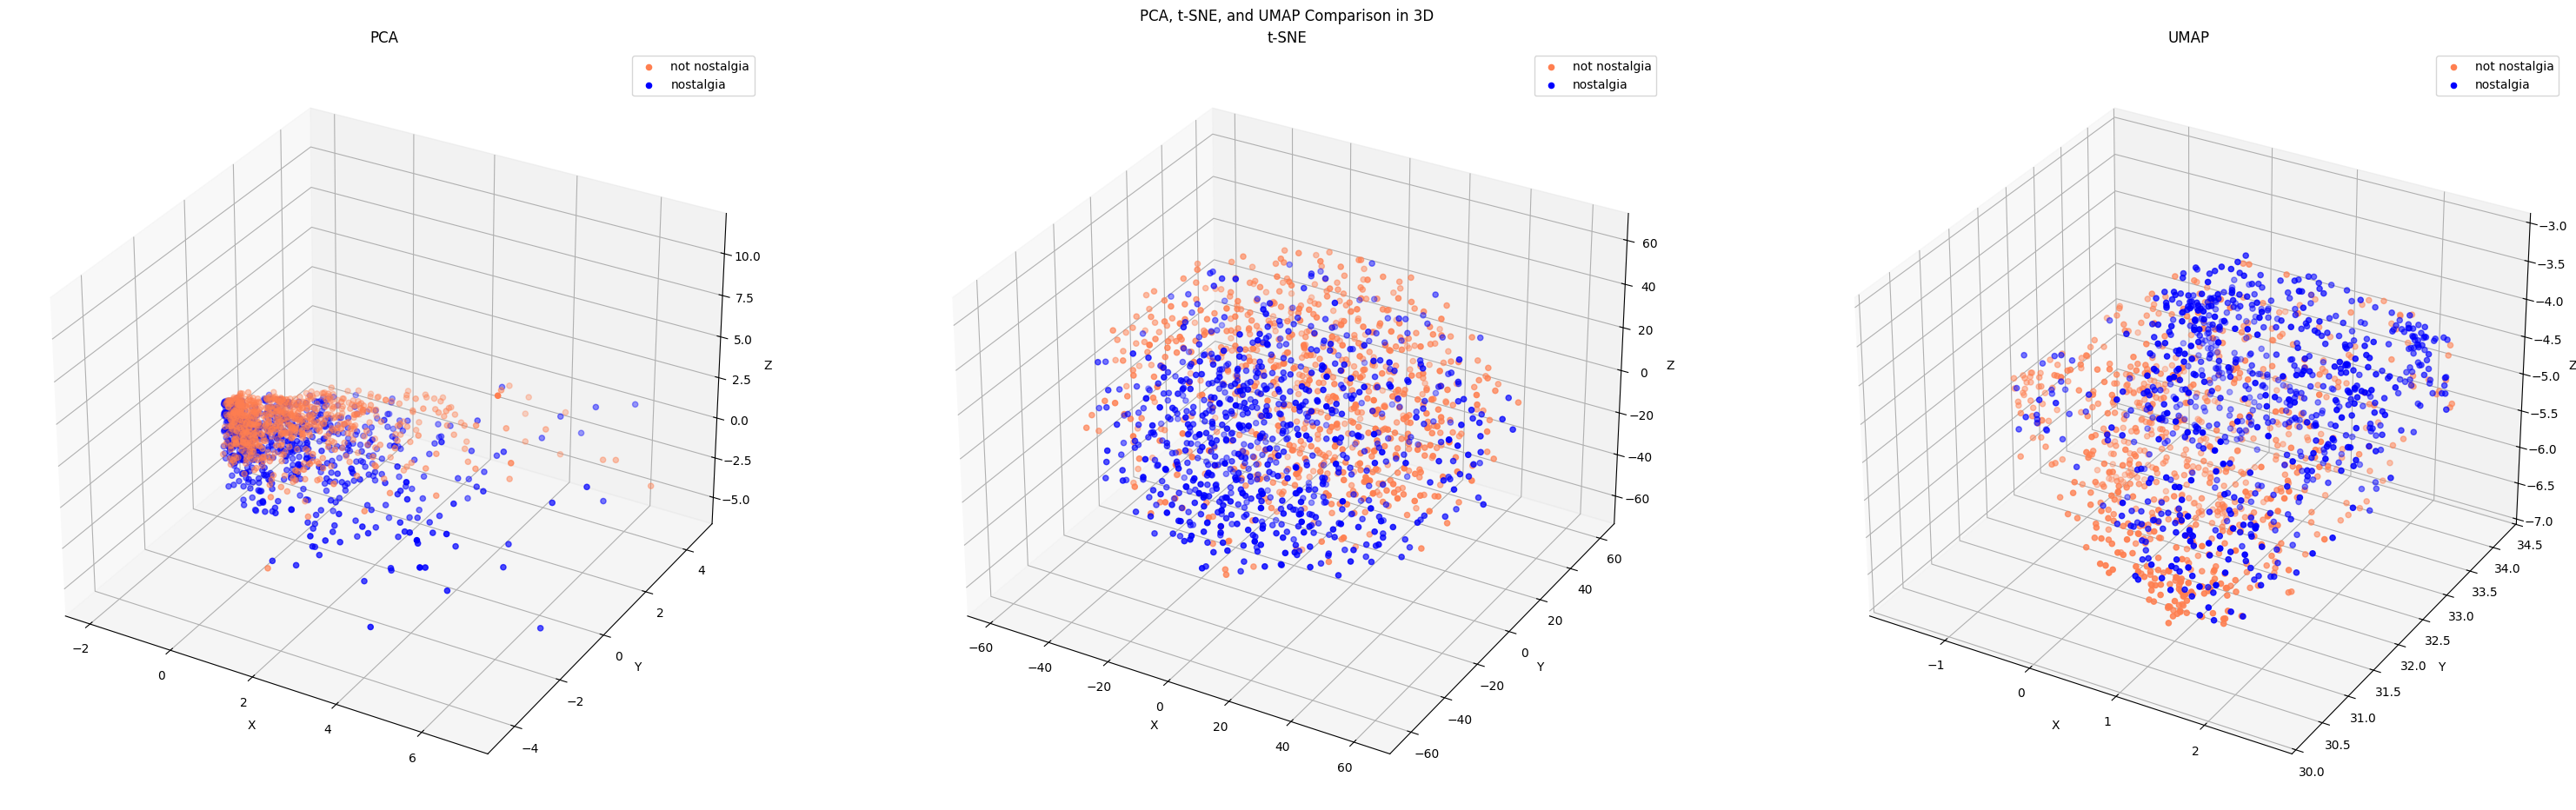

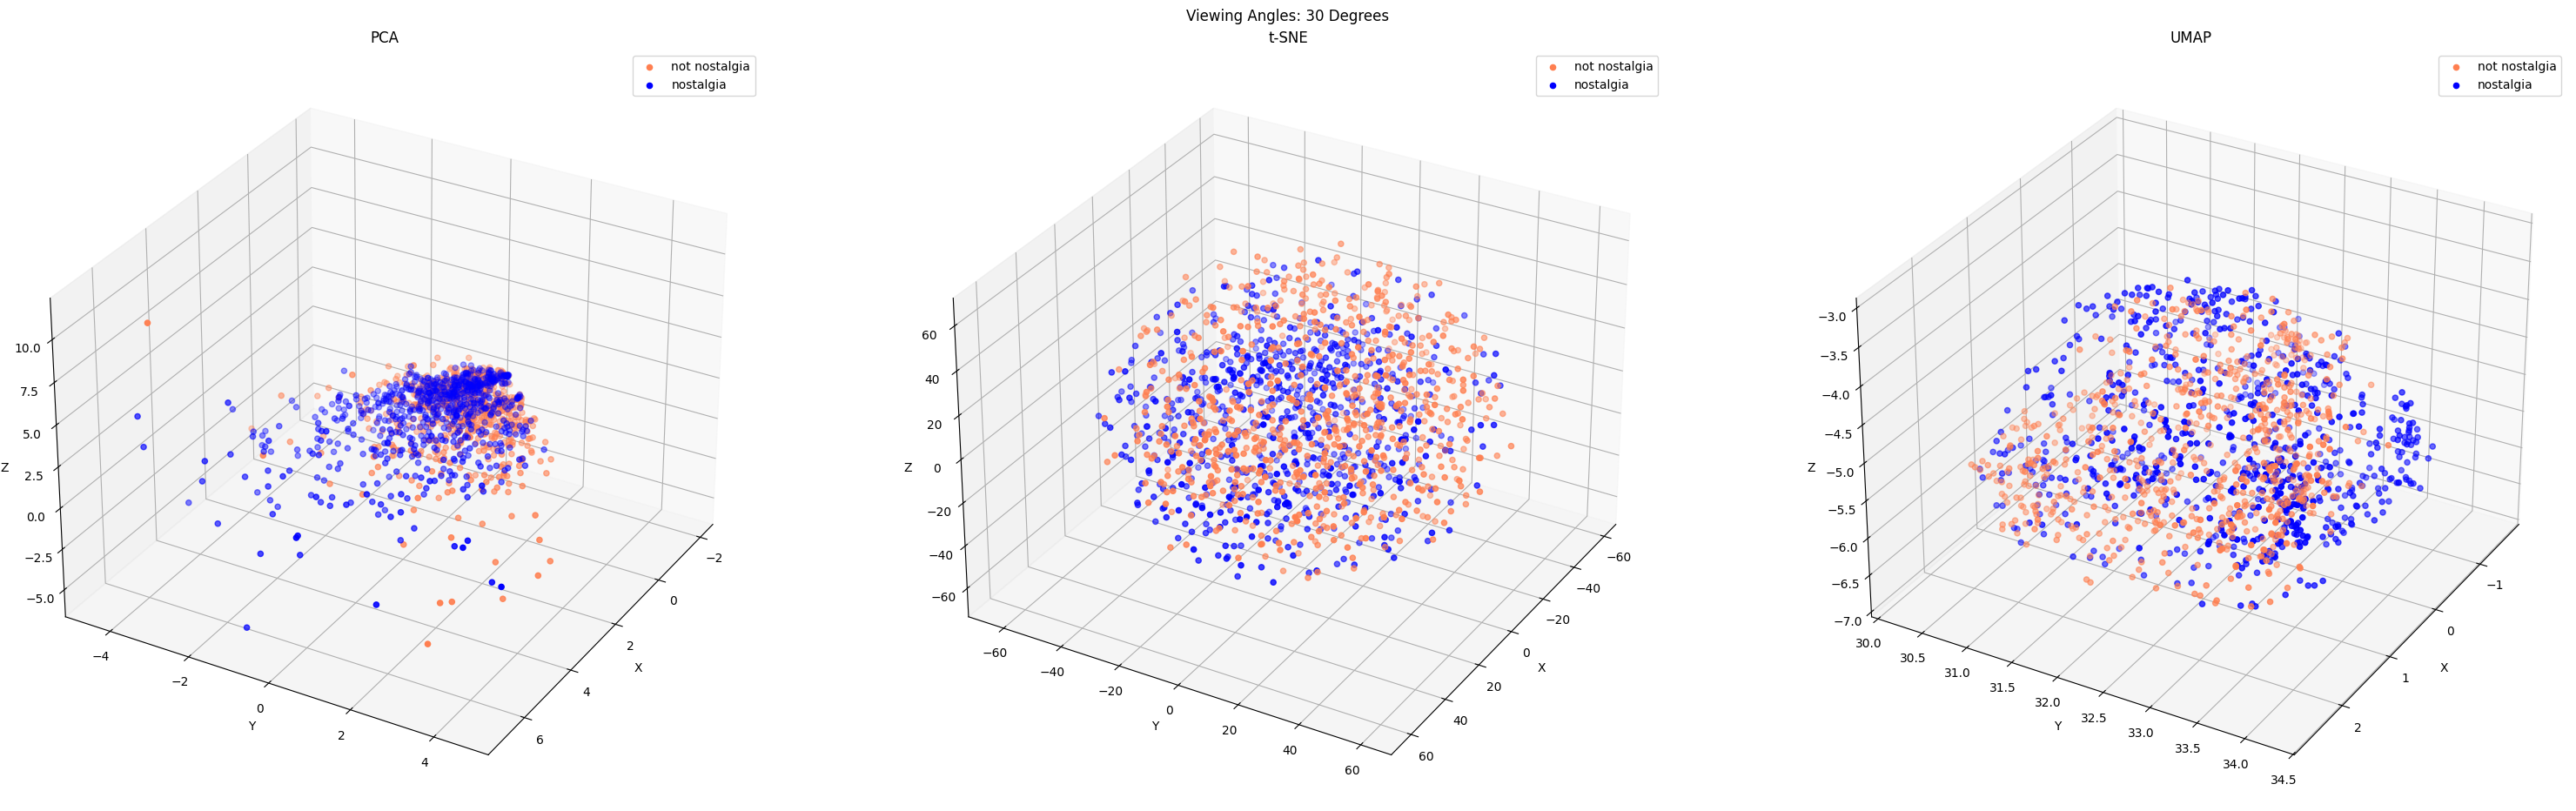

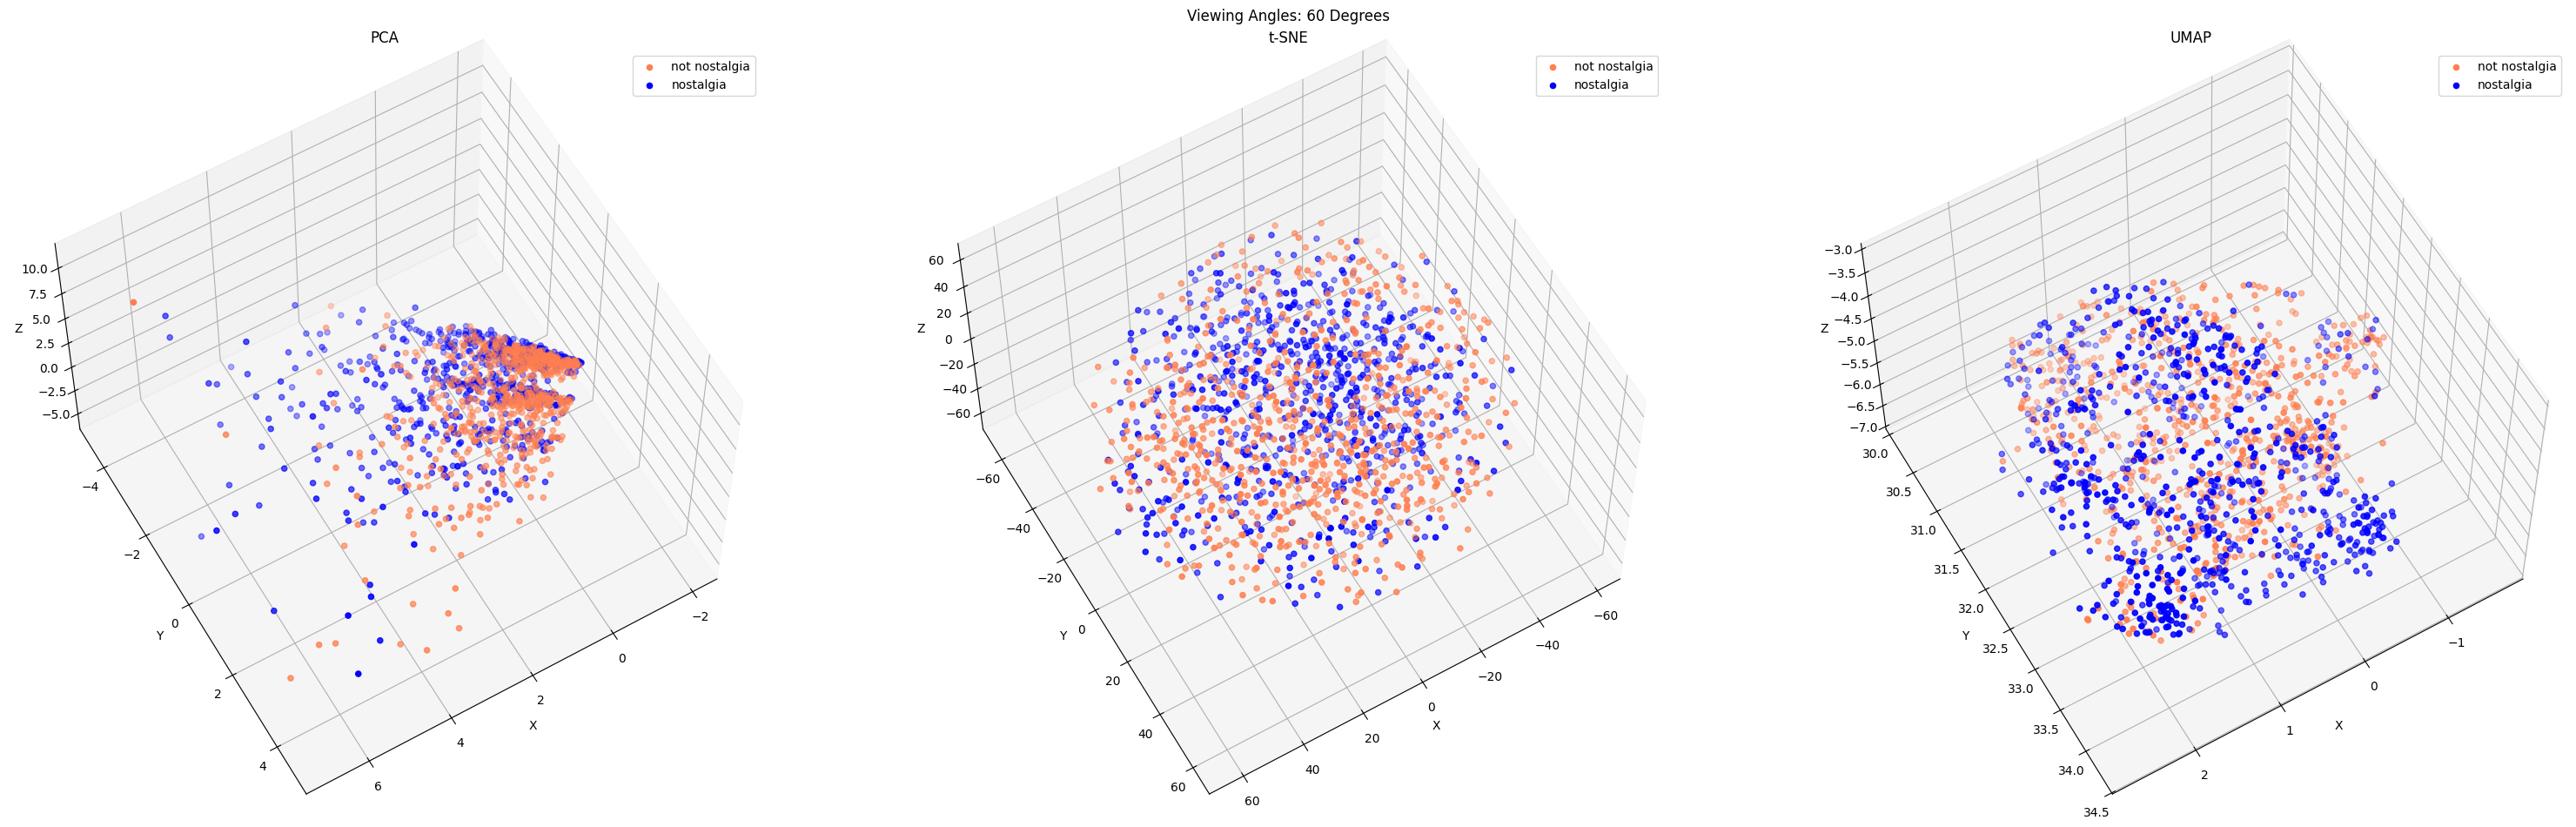

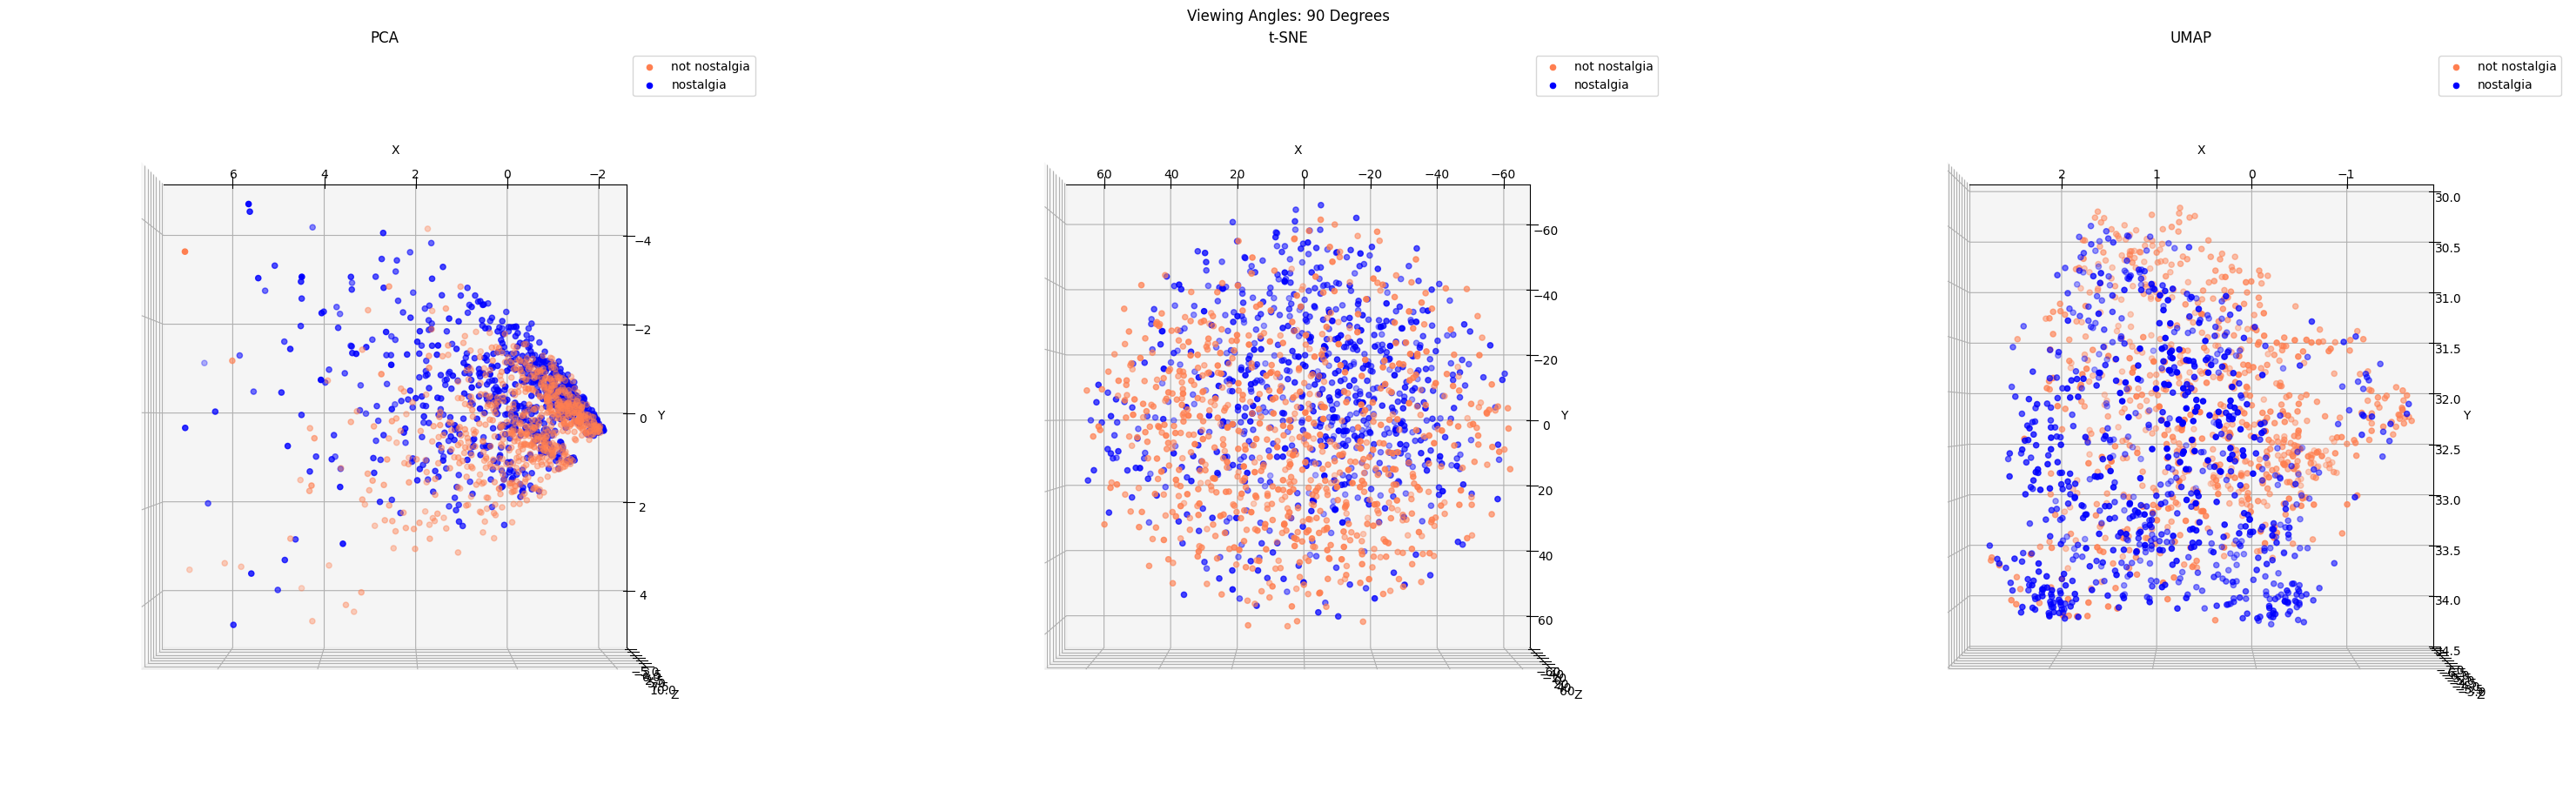

In [457]:
# Answer here
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA, t-SNE, and UMAP to the data for 3D
df_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)  # 3D
df_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
df_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique()

fig = plt.figure(figsize=(30, 10))  # Create a figure for 3D plots
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# Define a function to create a 3D scatter plot for each method
def plot_3d_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category][:, 0]
        ys = df_reduced[df['sentiment'] == category][:, 1]
        zs = df_reduced[df['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create subplots for PCA, t-SNE, and UMAP in 3D
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, df_pca_tdm_3d, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, df_tsne_tdm_3d, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, df_umap_tdm_3d, 'UMAP')

plt.show()

# Now let's visualize from different angles
for angle in [30, 60, 90]:
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f'Viewing Angles: {angle} Degrees')
    
    ax1 = fig.add_subplot(131, projection='3d')
    plot_3d_scatter(ax1, df_pca_tdm_3d, 'PCA')
    ax1.view_init(elev=angle, azim=angle)

    ax2 = fig.add_subplot(132, projection='3d')
    plot_3d_scatter(ax2, df_tsne_tdm_3d, 't-SNE')
    ax2.view_init(elev=angle, azim=angle)

    ax3 = fig.add_subplot(133, projection='3d')
    plot_3d_scatter(ax3, df_umap_tdm_3d, 'UMAP')
    ax3.view_init(elev=angle, azim=angle)

    plt.show()


### 3.6 Discretization and Binarization

In [458]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [474]:
df['sentiment_binary'] = df['sentiment'].map({'nostalgia': '1', 'not nostalgia': '0' })

In [475]:
df[:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   

                                      tokenized_text sentiment_binary  \
0  {great, 16years, have, those, for, Reeves, gol...                0   
1  {an, beautiful, forgotten, listened, was, of, ...                1   
2  {great, Always, who, have, --, people, had, vo...                1   
3  {who, later, 47, have, for, back, granted, Thi...                0   

  bin_category  
0          [1]  
1          [0]  
2          [0]  
3          [1]

In [476]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [477]:
df['bin_category'] = mlb.transform(df['sentiment']).tolist()

In [478]:
df[:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   

                                      tokenized_text sentiment_binary  \
0  {great, 16years, have, those, for, Reeves, gol...                0   
1  {an, beautiful, forgotten, listened, was, of, ...                1   
2  {great, Always, who, have, --, people, had, vo...                1   
3  {who, later, 47, have, for, back, granted, Thi...                0   

  bin_category  
0          [1]  
1          [0]  
2          [0]  
3          [1]

## 4. Data Exploration

In [479]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [480]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [481]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [482]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/8g/026l6x8j1qb6bl5t7vchk_wm0000gn/T/ipykernel_6112/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/8g/026l6x8j1qb6bl5t7vchk_wm0000gn/T/ipykernel_6112/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/8g/026l6x8j1qb6bl5t7vchk_wm0000gn/T/ipykernel_6112/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element f

## 5. Data Classification

In [483]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment', 'sentiment_binary']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
df_train, df_test, y_train, y_test = train_test_split(tdm_df, df['sentiment_binary'], test_size=0.3, random_state=42)

In [484]:
df_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
486    0    0    0   0   0    0    0   0     0   0  ...      0         0   
528    0    0    0   0   0    0    0   0     0   0  ...      0         0   
200    0    0    0   0   0    0    0   0     0   0  ...      0         0   
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
845    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1131   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1295   0    0    0   0   0    0    0   0     0   0  ...      0         0   
861    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1460   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1127   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
486       0         0        0    0    0    0        0      0  
528       0         0        0    0    0    0        0      0  
200       0         0        0    0    0    0        0      0  
890       0         0        0    0    0    0        0      0  
845       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1131      0         0        0    0    0    0        0      0  
1295      0         0        0    0    0    0        0      0  
861       0         0        0    0    0    0        0      0  
1460      0         0        0    0    0    0        0      0  
1127      0         0        0    0    0    0        0      0  

[1049 rows x 3730 columns]

In [485]:
df_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1117   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1396   0    0    0   0   0    0    0   0     0   0  ...      0         0   
423    0    0    0   0   0    0    0   0     0   0  ...      0         0   
414    0    0    0   0   0    0    0   0     0   0  ...      0         0   
452    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1084   0    0    0   0   0    0    0   0     0   0  ...      0         0   
991    0    0    0   0   0    0    0   0     0   0  ...      0         0   
651    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1117      0         0        0    0    0    0        0      0  
1396      0         0        0    0    0    0        0      0  
423       0         0        0    0    0    0        0      0  
414       0         0        0    0    0    0        0      0  
452       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1084      0         0        0    0    0    0        0      0  
991       0         0        0    0    0    0        0      0  
651       0         0        2    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [486]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_train, y_train)

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment', 'sentiment_binary']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# IMPORTANT: I change the 0 and 1 into '0' and '1' in df['sentiment_binary'] because the target_names cannot be int. 


# Make predictions on the test set
y_pred = nb_classifier.predict(df_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           1     0.9438    0.7706    0.8485       218
           0     0.8162    0.9569    0.8810       232

    accuracy                         0.8667       450
   macro avg     0.8800    0.8638    0.8647       450
weighted avg     0.8780    0.8667    0.8652       450



In [488]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['sentiment', 'sentiment_binary']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
df_train, df_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

In [489]:
df_train

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
486    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
528    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
200    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
890    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
845    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1131   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1295   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
861    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1460   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1127   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
486      0       0       0     0       0       0       0  
528      0       0       0     0       0       0       0  
200      0       0       0     0       0       0       0  
890      0       0       0     0       0       0       0  
845      0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1131     0       0       0     0       0       0       0  
1295     0       0       0     0       0       0       0  
861      0       0       0     0       0       0       0  
1460     0       0       0     0       0       0       0  
1127     0       1       0     0       0       0       0  

[1049 rows x 3950 columns]

In [490]:
df_test

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
1117   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1396   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
423    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
414    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
452    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1084   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
991    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
651    0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1188   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1459   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
1117     0       0       0     0       0       0       0  
1396     0       0       0     0       0       0       0  
423      0       0       0     0       0       0       0  
414      0       0       0     0       0       0       0  
452      0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1084     0       0       0     0       0       0       0  
991      0       0       0     0       0       0       0  
651      0       0       0     0       0       0       0  
1188     0       0       0     0       0       0       0  
1459     0       0       0     0       0       0       0  

[450 rows x 3950 columns]

In [491]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(df_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(df_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8555555555555555

Classification Report:
               precision    recall  f1-score   support

           1     0.8081    0.9440    0.8708       232
           0     0.9274    0.7615    0.8363       218

    accuracy                         0.8556       450
   macro avg     0.8677    0.8527    0.8535       450
weighted avg     0.8659    0.8556    0.8541       450

